In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape, test.shape)


(1460, 81) (1459, 80)


In [2]:
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


(1460, 81) (1459, 80)
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


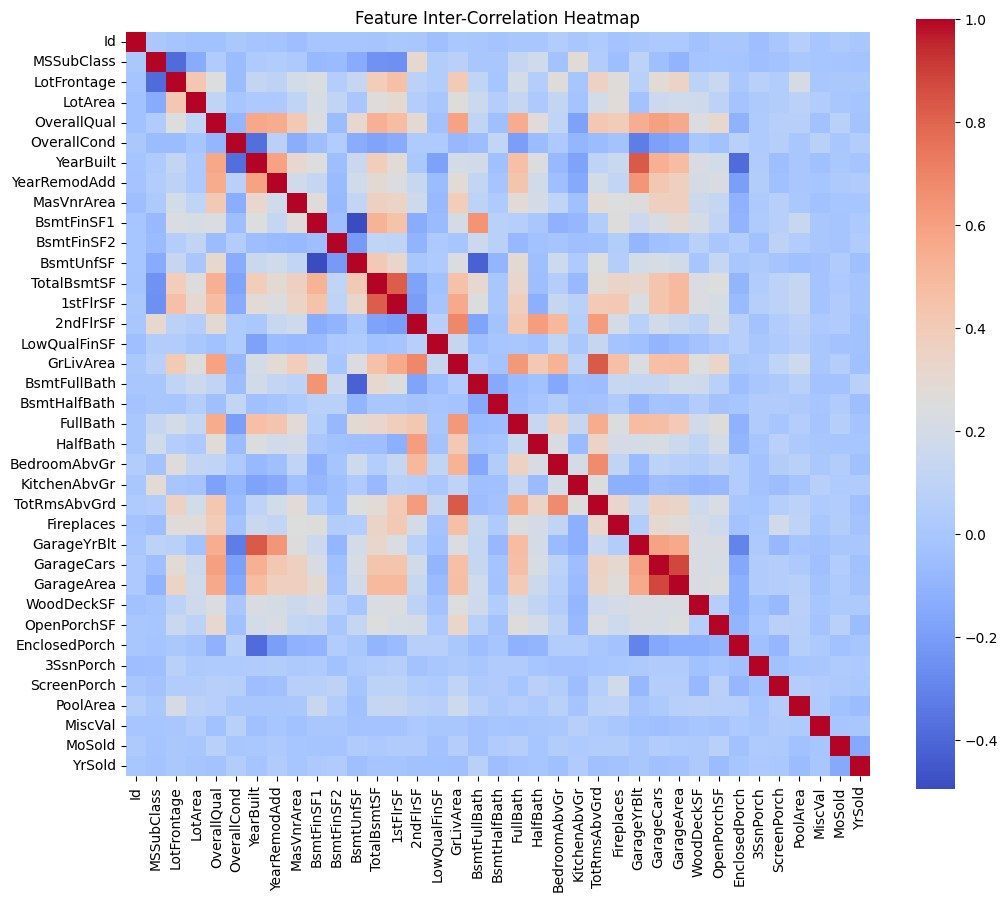

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape, test.shape)

missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

plt.figure(figsize=(12, 10))
# Select only numeric columns before calculating correlation
numeric_train = train.select_dtypes(include=['number']).drop(columns=['SalePrice'])
sns.heatmap(numeric_train.corr(), cmap='coolwarm', square=True)
plt.title("Feature Inter-Correlation Heatmap")
plt.show()

In [8]:
# Fill numeric with median
num_cols_train = train.select_dtypes(include=['float64', 'int64']).columns
train[num_cols_train] = train[num_cols_train].fillna(train[num_cols_train].median())

# Calculate numeric columns for the test set separately
num_cols_test = test.select_dtypes(include=['float64', 'int64']).columns
test[num_cols_test] = test[num_cols_test].fillna(test[num_cols_test].median())


# Fill categorical with mode
cat_cols_train = train.select_dtypes(include='object').columns
train[cat_cols_train] = train[cat_cols_train].fillna(train[cat_cols_train].mode().iloc[0])

# Calculate categorical columns for the test set separately
cat_cols_test = test.select_dtypes(include='object').columns
test[cat_cols_test] = test[cat_cols_test].fillna(test[cat_cols_test].mode().iloc[0])

In [9]:
# Combine train and test for consistent encoding
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], axis=0)

# One-Hot Encoding
data = pd.get_dummies(data, drop_first=True)

# Split back
train = data[data['source_train'] == 1].drop(['source_train'], axis=1)
test = data[data['source_train'] == 0].drop(['SalePrice', 'source_train'], axis=1)


In [10]:
train['TotalBath'] = (train['FullBath'] + 0.5*train['HalfBath'] +
                      train['BsmtFullBath'] + 0.5*train['BsmtHalfBath'])


In [11]:
train['HouseAge'] = train['YrSold'] - train['YearBuilt']
train['RemodAge'] = train['YrSold'] - train['YearRemodAdd']
train['GarageAge'] = train['YrSold'] - train['GarageYrBlt']


In [12]:
train['TotalPorchSF'] = train['OpenPorchSF'] + train['EnclosedPorch'] + \
                        train['3SsnPorch'] + train['ScreenPorch']


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np # Import numpy for square root

X = train.drop(['SalePrice', 'Id'], axis=1)
y = train['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
# Calculate MSE first
mse = mean_squared_error(y_val, y_pred)
# Then calculate RMSE by taking the square root of the MSE
rmse = np.sqrt(mse)
print("Validation RMSE:", rmse)

Validation RMSE: 51392.65875856919


In [16]:
# Combine train and test for consistent encoding
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], axis=0)

# One-Hot Encoding
data = pd.get_dummies(data, drop_first=True)

# Split back
train = data[data['source_train'] == 1].drop(['source_train'], axis=1)
test = data[data['source_train'] == 0].drop(['SalePrice', 'source_train'], axis=1)

# Apply feature engineering to train and test
train['TotalBath'] = (train['FullBath'] + 0.5*train['HalfBath'] +
                      train['BsmtFullBath'] + 0.5*train['BsmtHalfBath'])

train['HouseAge'] = train['YrSold'] - train['YearBuilt']
train['RemodAge'] = train['YrSold'] - train['YearRemodAdd']
# Address the missing values in 'GarageYrBlt' before calculating 'GarageAge'
# Using the median from the training data for consistency
train['GarageAge'] = train['YrSold'] - train['GarageYrBlt'].fillna(train['GarageYrBlt'].median())


train['TotalPorchSF'] = train['OpenPorchSF'] + train['EnclosedPorch'] + \
                        train['3SsnPorch'] + train['ScreenPorch']


# Apply the same feature engineering steps to the test set
test['TotalBath'] = (test['FullBath'] + 0.5*test['HalfBath'] +
                      test['BsmtFullBath'] + 0.5*test['BsmtHalfBath'])

test['HouseAge'] = test['YrSold'] - test['YearBuilt']
test['RemodAge'] = test['YrSold'] - test['YearRemodAdd']
# Address the missing values in 'GarageYrBlt' in the test set as well
test['GarageAge'] = test['YrSold'] - test['GarageYrBlt'].fillna(test['GarageYrBlt'].median())

test['TotalPorchSF'] = test['OpenPorchSF'] + test['EnclosedPorch'] + \
                        test['3SsnPorch'] + test['ScreenPorch']


# The rest of your code for model training and prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np # Import numpy for square root

X = train.drop(['SalePrice', 'Id'], axis=1)
y = train['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
# Calculate MSE first
mse = mean_squared_error(y_val, y_pred)
# Then calculate RMSE by taking the square root of the MSE
rmse = np.sqrt(mse)
print("Validation RMSE:", rmse)

final_preds = model.predict(test.drop(['Id'], axis=1))

submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': final_preds
})
submission.to_csv('submission.csv', index=False)

Validation RMSE: 51392.65875856919


In [17]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [18]:
missing = train.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [19]:
print(train.info())
print(train.nunique().sort_values())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [20]:
train['LotFrontage'].fillna(train['LotFrontage'].median(), inplace=True)


/tmp/ipython-input-20-3577323804.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['LotFrontage'].fillna(train['LotFrontage'].median(), inplace=True)


In [21]:
train['GarageType'].fillna('None', inplace=True)
train['Electrical'].fillna(train['Electrical'].mode()[0], inplace=True)


/tmp/ipython-input-21-3584696839.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['GarageType'].fillna('None', inplace=True)
/tmp/ipython-input-21-3584696839.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [22]:
ordinal_features = {
    "ExterQual": {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    "ExterCond": {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    "BsmtQual": {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    "BsmtCond": {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    "HeatingQC": {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    "KitchenQual": {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    "FireplaceQu": {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    "GarageQual": {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    "GarageCond": {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    "PoolQC": {'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4},
    "Fence": {'NA':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}
}

for col, mapping in ordinal_features.items():
    train[col] = train[col].map(mapping)


In [23]:
categorical_cols = train.select_dtypes(include='object').columns
train = pd.get_dummies(train, columns=categorical_cols, drop_first=True)


In [24]:
train['TotalBathrooms'] = (train['FullBath'] +
                           0.5 * train['HalfBath'] +
                           train['BsmtFullBath'] +
                           0.5 * train['BsmtHalfBath'])

train['TotalPorchSF'] = (train['OpenPorchSF'] + train['EnclosedPorch'] +
                         train['3SsnPorch'] + train['ScreenPorch'])

train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']


In [25]:
import numpy as np
train['SalePrice'] = np.log1p(train['SalePrice'])  # for better model performance


In [26]:
X = train.drop(['Id', 'SalePrice'], axis=1)
y = train['SalePrice']


In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

model = RandomForestRegressor(n_estimators=100, random_state=42)
score = cross_val_score(model, X, y, scoring="neg_root_mean_squared_error", cv=5)
print(f"RMSE: {-score.mean():.2f}")


RMSE: 0.14
